savepaf = PosixPath('images/Apple_Black_rot/image (1)_crop.jpg')
savepaf = PosixPath('images/Apple_Black_rot/image (1)_flip.jpg')
savepaf = PosixPath('images/Apple_Black_rot/image (1)_rotation.jpg')
savepaf = PosixPath('images/Apple_Black_rot/image (1)_blur.jpg')
savepaf = PosixPath('images/Apple_Black_rot/image (1)_contrast.jpg')
savepaf = PosixPath('images/Apple_Black_rot/image (1)_shear.jpg')


/home/jbarmentlo/Code/42/42-Leafliction/venv/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


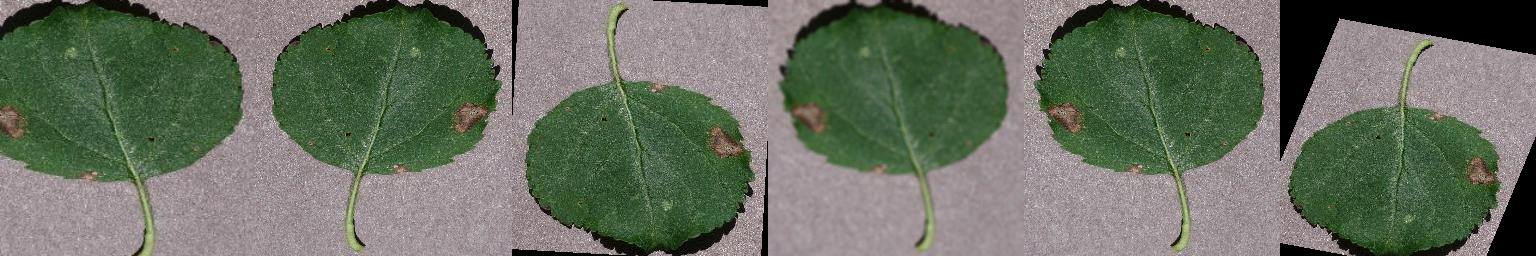

In [1]:
from typing import Dict, Callable
from torch import Tensor

from leafy.Augmentation import Augmentinator
from leafy.Augmentation import make_transforms

from torchvision.transforms.functional import to_pil_image, to_tensor
from PIL import Image
import torch

from pathlib import Path
from leafy.loader import ImageLoader
from torchvision.transforms import ToPILImage
from PIL import Image
topil = ToPILImage()

data_folder = Path("./images")

loader = ImageLoader(data_folder)        

im = to_tensor(Image.open('./images/Apple_Black_rot/image (1).jpg'))

transformations = make_transforms(im.shape)
aug = Augmentinator(transformations)
aug('./images/Apple_Black_rot/image (1).jpg')
# augmented = aug.augment(im)
# make_image_row(augmented)


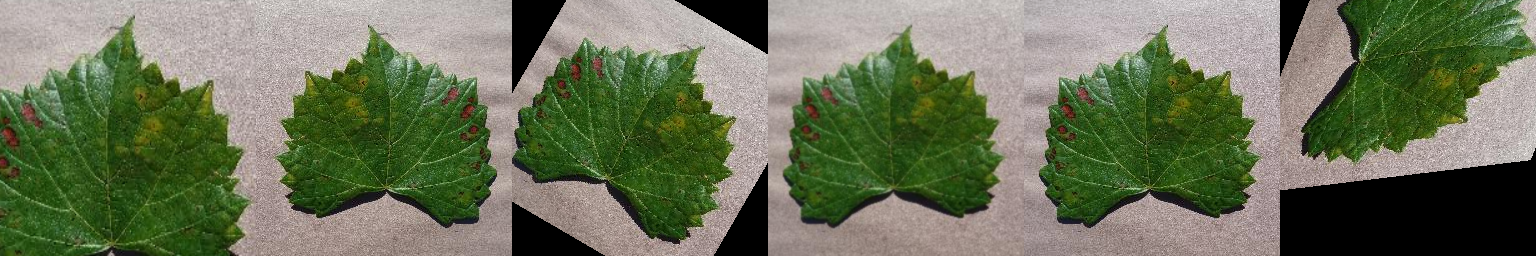

In [13]:
p =Path("./images/Apple_Black_rot/image (1).JPG")

p.parent / (p.with_suffix("").name + '_augmented') / p.suffix

PosixPath('images/Apple_Black_rot/image (1)_augmented/.JPG')